# End-to-end Learning for Early Classification of Time Series (ELECTS)

## Train and predict with an RNN trained with ELECTS

Early predictions with the RNN model.

Please run `python train.py` first to generate `snapshots/model.pth`

In [4]:
import os
os.environ['HOME'] = 'C:\\Users\\Grey'

In [ ]:
!python train.py

## Import dependencies

In [5]:
import torch
from data.bavariancrops import BavarianCrops, CLASSES
import matplotlib.pyplot as plt
from earlyrnn import EarlyRNN
import seaborn as sns
import numpy as np

In [13]:
ds = BavarianCrops(partition="eval")
model = EarlyRNN()
model.eval()
model.load_state_dict(torch.load("snapshots/model.pth"))

<All keys matched successfully>

## Take time series sample from dataset

The dataset contains Sentinel 2 satellite time series of Bavarian fields in 2018.
Each line represents spectral reflectances in one of 13 bands acquired by the satellite over the year.

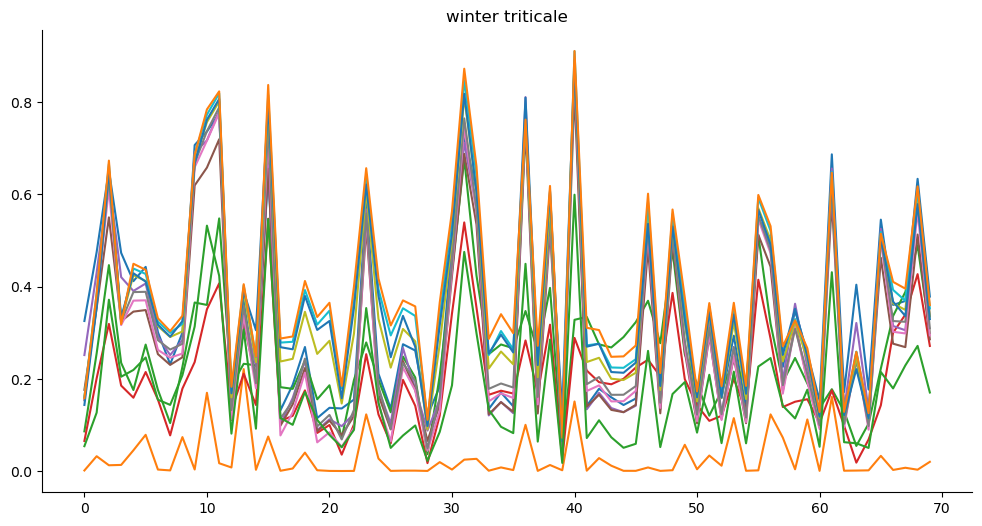

In [14]:
# change this to take different samples
index = 321

X,y = ds[index]

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(X)
ax.set_title(CLASSES[y[0]])
sns.despine(offset=0.2)

## Predict with the model

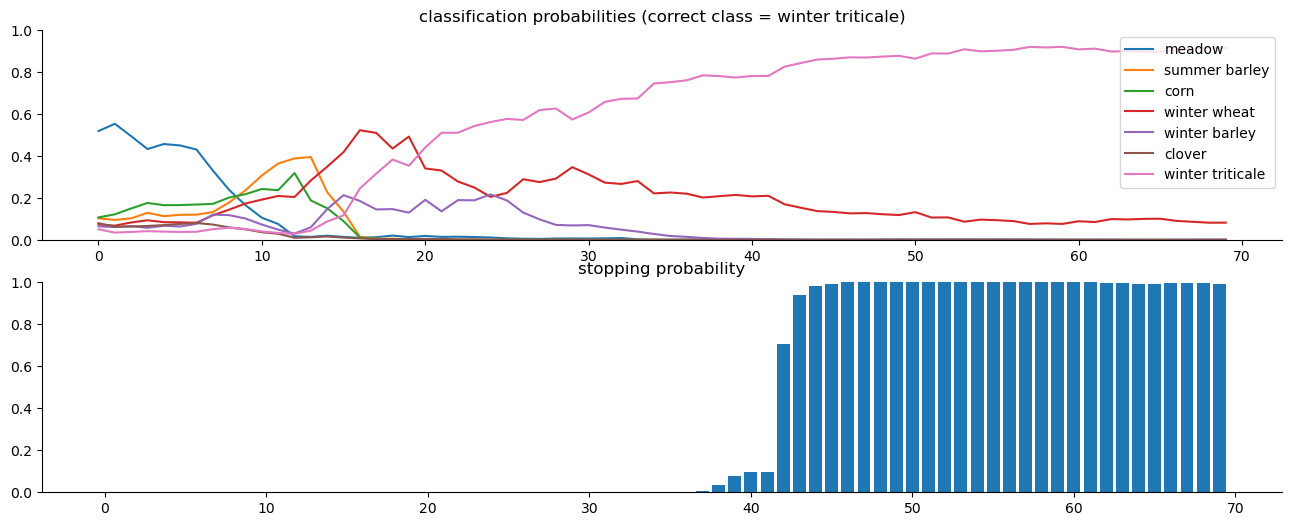

In [15]:
# change this T parameter to simulate shorter time series
T = 70

log_class_probabilities, probabilitiy_stopping = model(X[:T].unsqueeze(0))

# visualize
fig, axs = plt.subplots(2,1, figsize=(16,6))
ax = axs[0]
ax.plot(log_class_probabilities[0].exp().detach().numpy())
ax.set_ylim(0,1)
ax.legend(CLASSES, loc=1)
ax.set_title(f"classification probabilities (correct class = {CLASSES[y[0]]})")
ax = axs[1]
ax.bar(x = np.arange(probabilitiy_stopping.shape[1]), height = probabilitiy_stopping[0].detach().numpy())
ax.set_title("stopping probability")
ax.set_ylim(0,1)
sns.despine(offset=0.2)